In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('heart_2022_no_nans.csv')
df.head()

/tmp/ipykernel_252079/739688172.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


Фичей в датасете достаточно много. Нужно отобрать те из них, которые имеют бОльший вклад, но сначала нужно просто преобразовать данные. Для начала удалим дубликаты

In [2]:
df = df.drop_duplicates()
df.duplicated().any()

False

<Axes: >

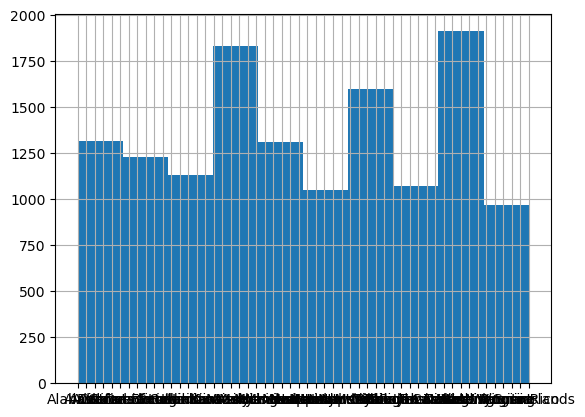

In [3]:
df[df['HadHeartAttack'] == 'Yes']['State'].hist()

Возможно, штат как-то и влияет на вероятность сердечного приступа, но мы пока что его выкинем, потому что делать one-hot-encoding категориальной переменной с 54 значениями как-то не хочется. Если качество будет плохим, можно будет попробовать добавить бинарную фичу, отвечающую за принадлежность к топ-3 штатам по количеству сердечных приступов

In [4]:
df = df.drop(columns=['State'])

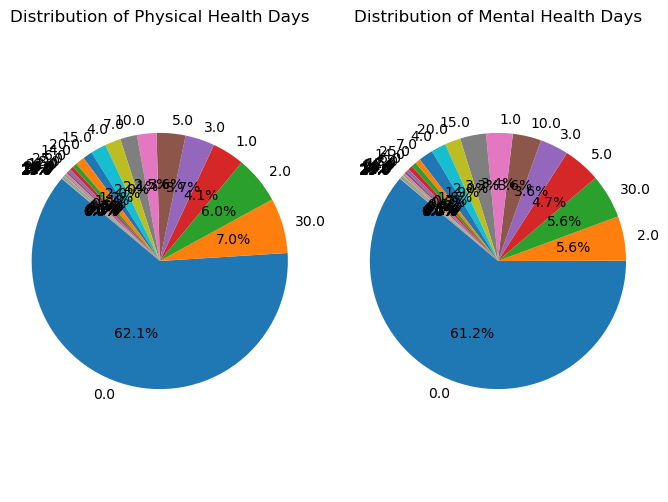

In [5]:
import matplotlib.pyplot as plt

physical_health_counts = df['PhysicalHealthDays'].value_counts()
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)  
plt.pie(physical_health_counts, labels=physical_health_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Physical Health Days')
plt.axis('equal')


mental_health_counts = df['MentalHealthDays'].value_counts()
plt.subplot(1, 2, 2)  
plt.pie(mental_health_counts, labels=mental_health_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Mental Health Days')
plt.axis('equal')

plt.show()

Не очень ясно, за что отвечают эти фичи (чтение описания датасета тоже не помогло), да и распределение у них скошено, поэтому логично выкинуть их

In [6]:
df = df.drop(
    columns=[
        'PhysicalHealthDays', 
        'MentalHealthDays'
    ]
)

Значения GeneralHealth имеют внутренний порядок, поэтому лучше закодировать их целыми числами, чем применять one-hot-encoding. То же самое касается фичей LastCheckupTime, AgeCategory и RemovedTeeth

In [7]:
df['GeneralHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object)

In [8]:
df['GeneralHealth'] = df['GeneralHealth'].map({
    "Poor" : 0,
    "Good" : 1,
    "Very good" : 2,
    "Fair" : 3,
    "Excellent" : 4
})

In [9]:
df['LastCheckupTime'].unique()

array(['Within past year (anytime less than 12 months ago)',
       '5 or more years ago',
       'Within past 2 years (1 year but less than 2 years ago)',
       'Within past 5 years (2 years but less than 5 years ago)'],
      dtype=object)

In [10]:
df['LastCheckupTime'] = df['LastCheckupTime'].map({
    'Within past year (anytime less than 12 months ago)' : 0,
    'Within past 2 years (1 year but less than 2 years ago)' : 1,
    'Within past 5 years (2 years but less than 5 years ago)' : 2,
    '5 or more years ago' : 3
})

In [11]:
df['RemovedTeeth'].unique()

array(['None of them', '6 or more, but not all', '1 to 5', 'All'],
      dtype=object)

In [12]:
df['RemovedTeeth'] = df['RemovedTeeth'].map({
    'None of them' : 0,
    '1 to 5' : 1,
    '6 or more, but not all' : 2,
    'All' : 3
})

In [13]:
sorted(df['AgeCategory'].unique())

['Age 18 to 24',
 'Age 25 to 29',
 'Age 30 to 34',
 'Age 35 to 39',
 'Age 40 to 44',
 'Age 45 to 49',
 'Age 50 to 54',
 'Age 55 to 59',
 'Age 60 to 64',
 'Age 65 to 69',
 'Age 70 to 74',
 'Age 75 to 79',
 'Age 80 or older']

In [14]:
df['AgeCategory'] = df['AgeCategory'].map({
    cat : i for i, cat in enumerate(sorted(df['AgeCategory']))
})

Численные переменные нужно нормализовать

In [15]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
for col in numeric_cols:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
df.head()

,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Female,-0.063069,-0.437113,Yes,1.373423,-0.781148,No,No,No,No,...,-0.985901,-0.560212,-0.104123,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Male,-0.063069,-0.437113,Yes,-0.708901,-0.781148,No,No,No,No,...,0.701798,0.545625,0.224400,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Male,-0.063069,-0.437113,No,0.679315,1.507534,No,No,No,No,...,1.358125,1.183895,0.459278,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Female,0.826852,-0.437113,Yes,1.373423,-0.781148,No,No,No,No,...,-0.048290,0.333180,0.407083,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Female,-0.952990,-0.437113,Yes,-1.403009,0.363193,No,No,No,No,...,-1.454706,-0.198634,0.675735,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


Все колонки со значениями Yes/No нужно бинаризовать. Пол тоже нужно бинаризовать

In [16]:
for column in df.columns:
    if sorted(df[column].unique()) == ["No", "Yes"]:
        df[column] = df[column].map({
            "Yes" : 1,
            "No" : 0
        })
df['Sex'] = df['Sex'].map({
            "Male" : 1,
            "Female" : 0
        }) 
df['HadDiabetes'] = df['HadDiabetes'].map({
    'No' : 0, 
    'Yes' : 1,
    'Yes, but only during pregnancy (female)' : 1,
    'No, pre-diabetes or borderline diabetes' : 0
})
df.head()

,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,-0.063069,-0.437113,1,1.373423,-0.781148,0,0,0,0,...,-0.985901,-0.560212,-0.104123,0,0,1,1,"Yes, received Tdap",0,No
1,1,-0.063069,-0.437113,1,-0.708901,-0.781148,0,0,0,0,...,0.701798,0.545625,0.224400,0,0,1,1,"Yes, received tetanus shot but not sure what type",0,No
2,1,-0.063069,-0.437113,0,0.679315,1.507534,0,0,0,0,...,1.358125,1.183895,0.459278,1,0,0,1,"No, did not receive any tetanus shot in the pa...",0,Yes
3,0,0.826852,-0.437113,1,1.373423,-0.781148,0,0,0,0,...,-0.048290,0.333180,0.407083,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,Yes
4,0,-0.952990,-0.437113,1,-1.403009,0.363193,0,0,0,0,...,-1.454706,-0.198634,0.675735,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,No


Колонку CovidPos тоже бинаризую. Надеюсь, что 3% отнесенных к больным с использованием домашнего теста не обидятся

In [17]:
df['CovidPos'] = df['CovidPos'].map({
    "Yes" : 1,
    "No" : 0,
    "Tested positive using home test without a health professional" : 1
})

По отношению к остальным колонкам можно применить one-hot-encoding

In [18]:
df = pd.get_dummies(
    df, 
    columns=[
        'ECigaretteUsage',
        'SmokerStatus',
        'RaceEthnicityCategory',
        'TetanusLast10Tdap'
    ], 
    drop_first=True,
    dtype=float
)

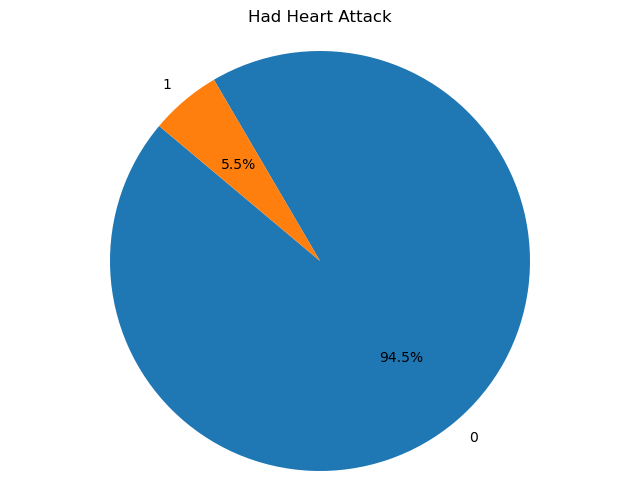

In [19]:
attack_counts = df['HadHeartAttack'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(attack_counts, labels=attack_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Had Heart Attack')
plt.axis('equal') 
plt.show()

Выровняем датасет и осуществим отбор фичей с помощью catboost

In [20]:
condition0 = (df['HadHeartAttack'] == 0)
condition1 = (df['HadHeartAttack'] == 1)
rows_to_drop = len(df[condition0]) - len(df[condition1])
indices_to_drop = df[condition0].sample(n=rows_to_drop).index
df = df.drop(indices_to_drop)

In [21]:
import numpy as np
def select_features(model, name):
    X = df.drop(columns=['HadHeartAttack'])
    y = df['HadHeartAttack']
    model.fit(X, y)
    if name == 'CatBoost':
        coef = model.get_feature_importance()
    elif name == 'Random Forest':
        coef = model.feature_importances_
    else:
        coef = model.coef_
    threshold = np.percentile(np.abs(coef), 75)
    significant_features = np.array(X.columns)[np.abs(coef) >= threshold]
    significant_coefficients = coef[np.abs(coef) >= threshold]

    plt.figure(figsize=(8, 6))
    plt.barh(significant_features, significant_coefficients)
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.title(f'Significant Feature Importance using {name}')
    plt.xticks(rotation=45, ha="right")
    plt.show()
    return significant_features

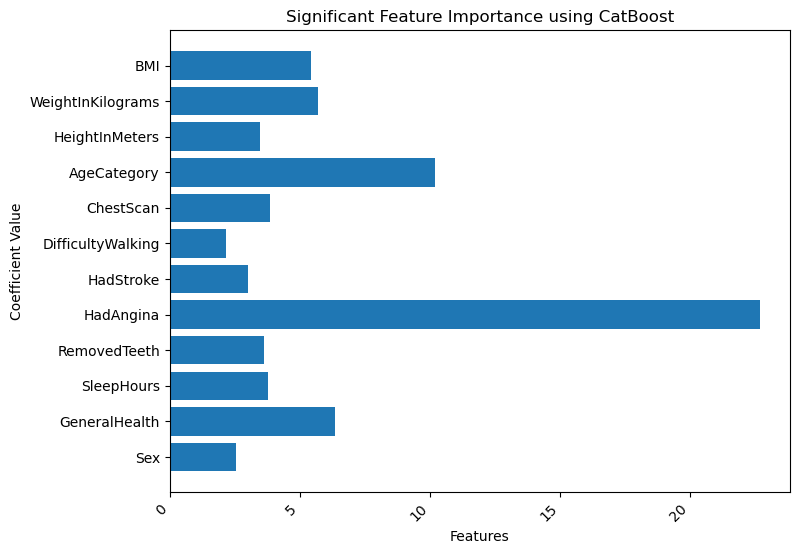

array(['Sex', 'GeneralHealth', 'SleepHours', 'RemovedTeeth', 'HadAngina',
       'HadStroke', 'DifficultyWalking', 'ChestScan', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI'], dtype=object)

In [22]:
from catboost import CatBoostClassifier
select_features(CatBoostClassifier(verbose=0), 'CatBoost')

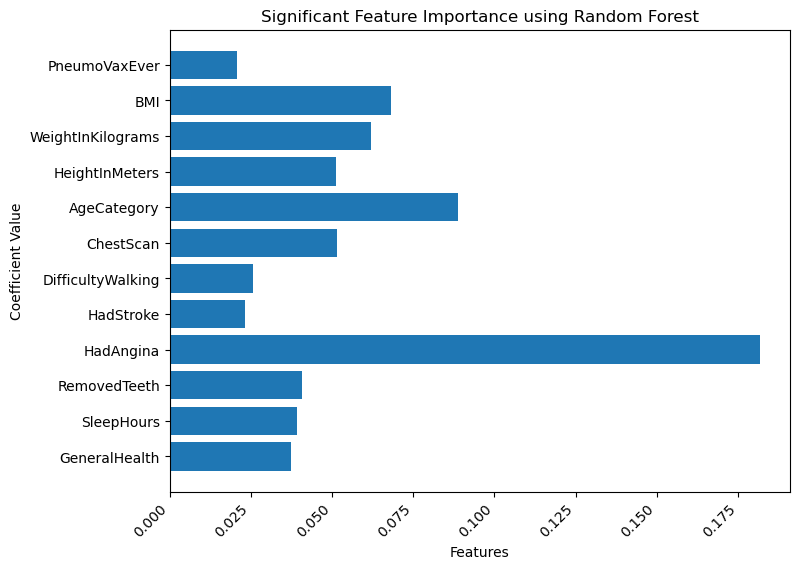

array(['GeneralHealth', 'SleepHours', 'RemovedTeeth', 'HadAngina',
       'HadStroke', 'DifficultyWalking', 'ChestScan', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'PneumoVaxEver'],
      dtype=object)

In [23]:
from sklearn.ensemble import RandomForestClassifier
select_features(RandomForestClassifier(n_jobs=-1), 'Random Forest')

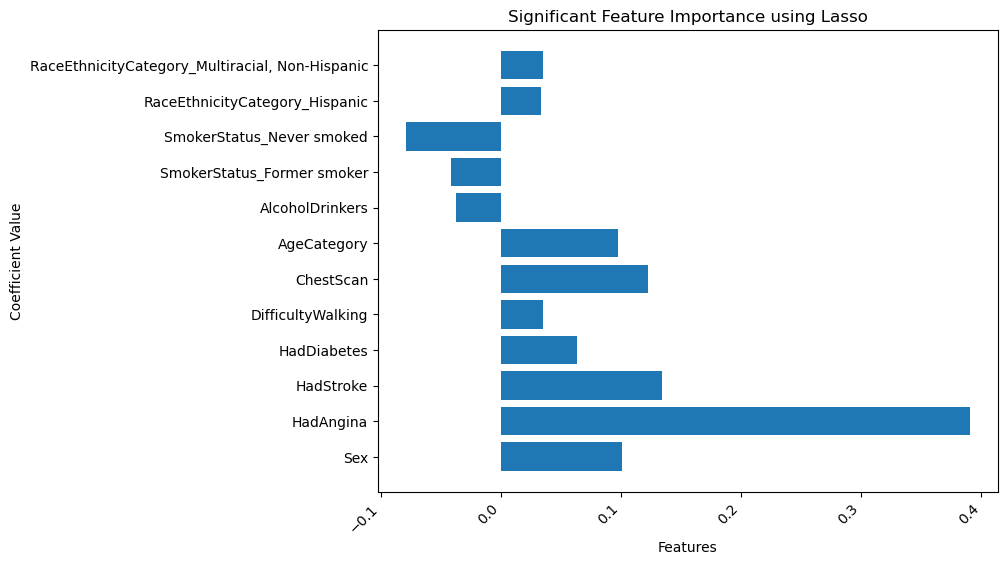

array(['Sex', 'HadAngina', 'HadStroke', 'HadDiabetes',
       'DifficultyWalking', 'ChestScan', 'AgeCategory', 'AlcoholDrinkers',
       'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked',
       'RaceEthnicityCategory_Hispanic',
       'RaceEthnicityCategory_Multiracial, Non-Hispanic'], dtype=object)

In [24]:
from sklearn.linear_model import LassoCV
select_features(LassoCV(), 'Lasso')

Эти фичи мы и будем использовать для выбора и обучения моделей